In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# import pandas_profiling

# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ----------------- 모델 ----------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
# from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

# from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [10]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# 데이터 로드

In [6]:
train = pd.read_csv('../data/traindf.csv')
test = pd.read_csv('../data/testdf.csv')
train = train.rename(columns={'Unnamed: 0':'날짜'})
test = test.rename(columns={'Unnamed: 0':'날짜'})

# train.info(),test.info()

In [5]:
train.head(2)

,날짜,장중_긍정비율,장중_부정비율,장중_긍부정비율,장외_긍정비율,장외_부정비율,장외_긍부정비율,등락률,등락여부
0,2021-01-04,0.888889,0.111111,0.666667,0.916667,0.083333,0.75,2.47,1.0
1,2021-01-05,0.951613,0.048387,0.854839,0.900000,0.100000,0.70,1.57,1.0


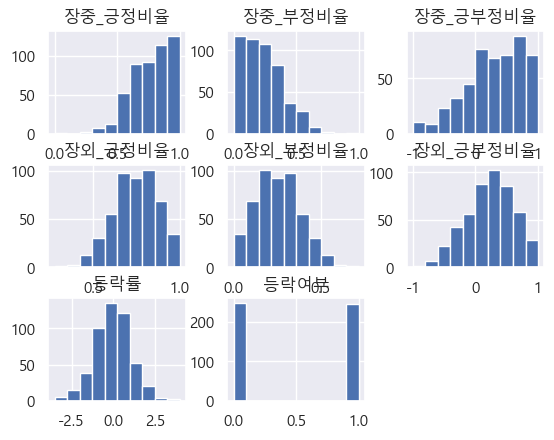

In [6]:
train.hist()
plt.show()

## 스케일링 X
* RMSE : 0.9662

In [7]:
X_train = train[['장중_긍정비율','장중_부정비율','장중_긍부정비율','장외_긍정비율','장외_부정비율','장외_긍부정비율']]
y_train = train['등락률']
X_test = test[['장중_긍정비율','장중_부정비율','장중_긍부정비율','장외_긍정비율','장외_부정비율','장외_긍부정비율']]
y_test= test['등락률']

Best param: {'reg_alpha': 6.967235245933871, 'reg_lambda': 1.3562544880457188, 'learning_rate': 0.09590960213297267, 'max_depth': 30}

In [11]:
estimators = [
   ('lr', RidgeCV()),
   ('svr', LinearSVR(random_state=42))
]

In [12]:
 reg = StackingRegressor(
  estimators=estimators,
   final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)

In [13]:
# reg=StackingRegressor(estimators)
reg.fit(X_train,y_train)
# print( xgb.coef_ )

pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE : {rmse:.4f}")

RMSE : 0.9662
